In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from PIL import Image
from io import BytesIO

%matplotlib inline

In [112]:
df = pd.read_csv("../data/train.csv")
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [113]:
pilot = df
pilot.tail()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20
9911,fff8e47c766799c9e12f3cb3d66ad228,0,1,1,1,0,0,0,0,0,0,0,0,30


In [122]:
# I found in an earlier run that these images weren't resized properly. 
# No idea why, but I didn't have a chance to investigate.
baddies = [67, 592, 2445, 2615, 3858, 8980, 9447, 9562]
pilot = pilot.iloc[pilot.index.difference(baddies)]
pilot.index = np.arange(0, pilot.shape[0])
pilot.shape

(9896, 14)

In [123]:
images = pilot.apply(
    lambda t: np.asarray(Image.open(
        "../data/train_scaled_padded_black_and_white/" + t.Id + ".jpg")).reshape((1,47089)), axis=1)

In [125]:
images = np.concatenate(images)
images.shape

(9896, 47089)

In [126]:
model = PCA()
model.fit(images)
transformed.shape

(20, 20)

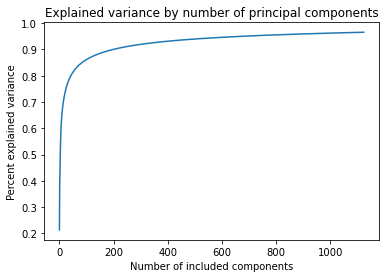

In [127]:
ratios = pd.DataFrame(model.explained_variance_ratio_)

explained_df = pd.DataFrame()
explained_df['Components'] = np.arange(0,1124)
explained_df['Explained Variance'] = ratios.cumsum()
explained_df.set_index('Components', inplace=True)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(explained_df.index, explained_df['Explained Variance'])
plt.title("Explained variance by number of principal components")
plt.ylabel("Percent explained variance")
plt.xlabel("Number of included components")
plt.show()

In [128]:
explained_df[explained_df['Explained Variance'] > .9].head()

,Explained Variance
Components,
199,0.900239
200,0.900492
201,0.900740
202,0.900988
203,0.901235
